In this notebook, we will see how we can solve a (non-computational) NST part IB physics B Classical Dynamics question using computing. The question we will try is question 27a:
![ ](Screen Shot 2016-07-06 at 4.55.13 PM.png)

First, we import some modules, including springs, a notebook containing modules for drawing springs and masses.

In [1]:
from springs import *
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

We then make a number of particles and springs to connect them

In [2]:
particles = []
particles.append(Particle(pos = np.array([-15.,0.,0.]),
                         v = np.array([0.,0.,0.]),
                         inv_mass = 1.,
                         fixed = True))
particles.append(Particle(pos = np.array([-5.,0.,0.]),
                         v = np.array([5.,0.,0.]),
                         inv_mass = 1.,
                         fixed = False))
particles.append(Particle(pos = np.array([5.,0.,0.]),
                         v = np.array([-5.,0.,0.]),
                         inv_mass = 1.,
                         fixed = False))
particles.append(Particle(pos = np.array([15.,0.,0.]),
                         v = np.array([0.,0.,0.]),
                         inv_mass = 1.,
                         fixed = True))
k = 1.
K = 1.
springs = []
springs.append(Spring(particle_1 = particles [0],
                     particle_2 = particles [1],
                     k = k))
springs.append(Spring(particle_1 = particles [1],
                     particle_2 = particles [2],
                     k = K))
springs.append(Spring(particle_1 = particles [2],
                     particle_2 = particles [3],
                     k = k))

We then group these objects together into a system, and try running the system with different values of K repeatedly. Once this cell is done executing, execute the last cell to see the results and see how they compare with the expected value of 
$$ \\ \omega^{2} = \frac{k + 2K}{m}$$
With k = 1, m = 1.

In [3]:
my_system = System(particles = particles, springs = springs, stop_on_cycle = True)
K_history = []
time_periods = []
while K <15:
    my_system.time = 0
    my_system.run_for(10.)
    K_history.append(K)
    time_periods.append(my_system.time)
    particles[1].pos = np.array([-5.,0.,0.])
    particles[2].pos = np.array([5.,0.,0.])
    particles[1].v = np.array([5.,0.,0.])
    particles[2].v = np.array([-5.,0.,0.])
    K += 1
    springs[1].k = K

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


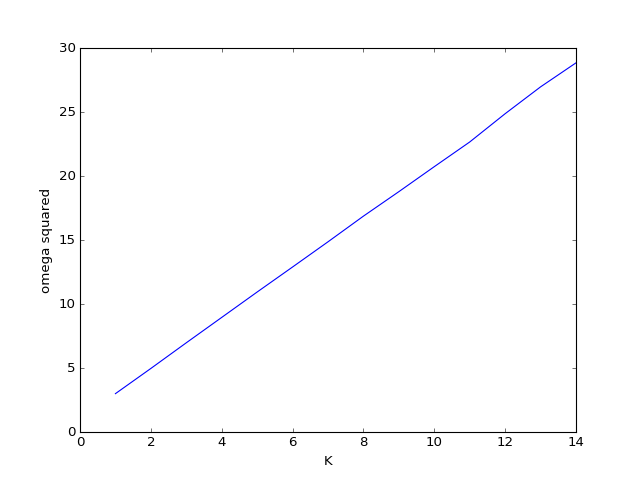

omega^2=1.985962K+0.981517


In [4]:
omegasq = []
for time_period in time_periods:
    omegasq.append((2*np.pi/time_period)**2)
plt.plot(K_history,omegasq)
plt.ylabel('omega squared')
plt.xlabel('K')
fitted = np.polyfit(K_history,omegasq,1)
print ("omega^2=%.6fK+%.6f"%(fitted[0],fitted[1]))